In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def fderiv(t,y,k,n1,n2,n3):
    
    return k*(n1-y/2.0)**2*(n2-y/2.0)**2*(n3-3.0*y/4.0)**3

### Fourth Order Runge Kutta Algorithm ###

The algorithm is actually quite simple to implement.  We begin with some definitions. Consider a
differential equation given by:

\begin{equation}
y^\prime = \frac{dy}{dt} = f(t,y)
\end{equation}

which we wish to solve on the interval $a \leq t \leq b$, in the case where we know the initial
value of the function (and also its derivative) at $t=a$:

\begin{equation}
y_a = y(t=a)
\end{equation}
\begin{equation}
y^\prime_a = f(t=a,y=y_a)
\end{equation}

The Fourth-Order Runge Kutta algorithm proceeds as follows:

\begin{equation}
F_1 = f(t_i,y_i) \\
F_2 = f(t_i + \frac{h}{2}, y_i + \frac{h}{2}F_1) \\
F_3 = f(t_i + \frac{h}{2}, y_i + \frac{h}{2}F_2) \\
F_4 = f(t_i + h, y_i + h F_3)
\end{equation}

\begin{equation}
y_{i+1} = y_i + \frac{h}{6} \left ( F_1 + 2F_2 + 2F3 + F_4 \right)
\end{equation}

In [36]:
def rk4(t,y,tau,par):
        
    F1 = fderiv(t,y,*par)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    ytemp1 = y + half_tau*F1
        
    F2 = fderiv(t_half,ytemp1,*par)
    
    ytemp2 = y + half_tau*F2
        
    F3 = fderiv(t_half,ytemp2,*par)
    
    t_full = t + tau

    ytemp3 = y + tau*F3
        
    F4 = fderiv(t_full,ytemp3,*par)
    
    y = y + tau/6.0*(F1+F4+2.0*(F2+F3))
    
    #print ('y = %0.3f   F1,F2,F3,F4 = %0.3f,%0.3f,%0.3f,%0.3f  ytemp1,ytemp2,ytemp3 = %0.3f,%0.3f,%0.3f' % (y,F1,F2,F3,F4,ytemp1,ytemp2,ytemp3))
    
    return y

Value of x at t = 0.190 is 2098.834


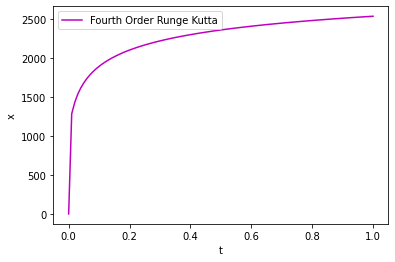

In [37]:
nStep = 100
a = 0.0
b = 1.0

par = np.array([6.22E-19,2000.0,2000.0,3000.0])
    
tau = (b-a)/nStep

y0 = 0.0
yp0 = par[0]*par[1]**2*par[2]**2*par[3]**2

yplot4 = np.zeros(nStep+1)
tplot4 = np.zeros(nStep+1)
deriv4 = np.zeros(nStep+1)

yplot4[0] = y0
tplot4[0] = a
deriv4[0] = yp0

debug = False

time = 0.0
flag = True

for iStep in range(nStep):
    yplot4[iStep+1] = rk4(time,yplot4[iStep],tau,par)
    time = time + tau
    tplot4[iStep+1] = time
    if time>=0.2 and flag:
        print ('Value of x at t = %0.3f is %0.3f' % (time-tau,yplot4[iStep+1]))
        flag = False

if debug:
    print ('Time Values at interval endpoints')
    print (tplot4[nStep])
    print (tplot4[0])
    print (len(tplot4))

    print ('Function Values at interval endpoints')
    print (yplot4[nStep])
    print (yplot4[0])
    print (len(yplot4))
    
plt.plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
plt.ylabel('x')
plt.xlabel('t')
#plt.xscale('log')
plt.legend()
    


[   0.          948.22948225 1233.58810069 1397.9868906  1511.98295839
 1597.7094233  1666.87627952 1724.00955869 1772.23716018 1814.04200782
 1851.20896797 1884.52202411 1914.49385819 1941.60959452 1966.30661825
 1988.97457541 2009.9553729  2029.54317846 2047.98112298 2065.36779267
 2081.75910737 2097.22930324 2111.84929345 2125.68666821 2138.80569473
 2151.26731729 2163.12915717 2174.44551271 2185.26735924 2195.64234915
 2205.61481185 2215.22575378 2224.51285841 2233.51048624 2242.24500155
 2250.71020431 2258.91248531 2266.8619866  2274.56863174 2282.04212584
 2289.29195551 2296.3273889  2303.15747568 2309.79104705 2316.23671573
 2322.50287597 2328.59770356 2334.5291558  2340.3049715  2345.93267104
 2351.41955628 2356.77271064 2361.99899905 2367.10506797 2372.09734538
 2376.9820408  2381.76514526 2386.45243132 2391.04945308 2395.56154615
 2399.99382767 2404.35119631 2408.63833226 2412.85969724 2417.01907034
 2421.10906676 2425.12727502 2429.07566855 2432.95617704 2436.77068642
 2440.

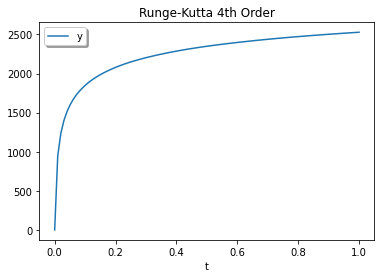

In [54]:
from scipy.integrate import solve_ivp

trange = np.array([0.0,1.0])
y_initial = np.array([0.0])

nSteps = 100
times = np.linspace(0.0,1.0,nSteps)

sol = solve_ivp(fun=fderiv, t_span=trange, 
                y0=y_initial, method='RK45', 
                t_eval=times, dense_output=False, 
                events=None, vectorized=False, 
                args=par)

print (sol.y[0])

plt.plot(sol.t, sol.y[0])

plt.xlabel('t')
plt.legend('y',shadow=True)
plt.title('Runge-Kutta 4th Order')
plt.show()